In [19]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist
import os
from tqdm import tqdm
import scipy

In [22]:
def process(image_path, denoised_path):
    noise_array = []
    for file in tqdm(os.listdir(denoised_path)):
        try:
            image = imread(os.path.join(image_path, file))
            denoised_image = imread(os.path.join(denoised_path, file))
            noise = (image) - denoised_image
            noise_array.append(noise)
        except:
            continue

    mean_noise = np.mean(noise_array, axis=0)
    mean_noise = rgb2gray(mean_noise)
    return mean_noise

In [17]:
def plot_fft(mean_noise, cmap="Blues"):
    FFT = scipy.fft.fft2(mean_noise)
    plt.figure(num=None, figsize=(8, 6), dpi=80)
    log_fft = np.log(abs(FFT))
    log_fft = log_fft
    ax = plt.imshow(log_fft, cmap=cmap)
    plt.colorbar(ax)

In [23]:
image_dir = "./TestSet/biggan_256/"
denoised_dir = "KAIR/results/biggan_256_dncnn3"
mean_noise = process(image_dir, denoised_dir)

100%|██████████| 501/501 [00:02<00:00, 201.83it/s]


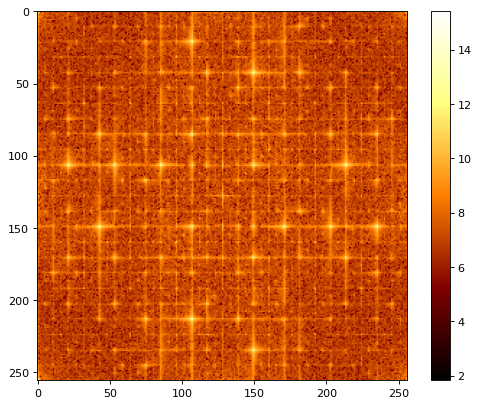

In [24]:
plot_fft(mean_noise, "afmhot")

In [27]:
image_dir = "./TestSet/dalle-mini_valid/"
denoised_dir = "KAIR/results/dalle-mini_valid_dncnn3"
mean_noise = process(image_dir, denoised_dir)

100%|██████████| 1001/1001 [00:05<00:00, 192.60it/s]


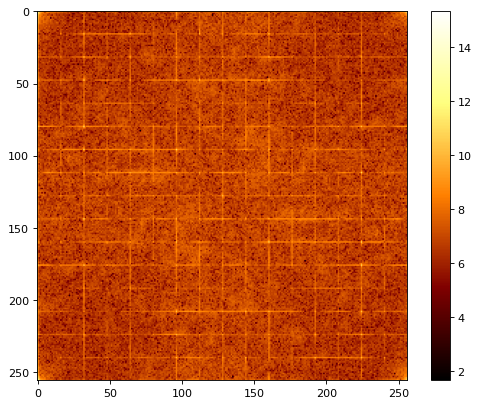

In [33]:
plot_fft(mean_noise, "afmhot")

100%|██████████| 1000/1000 [00:11<00:00, 87.86it/s]


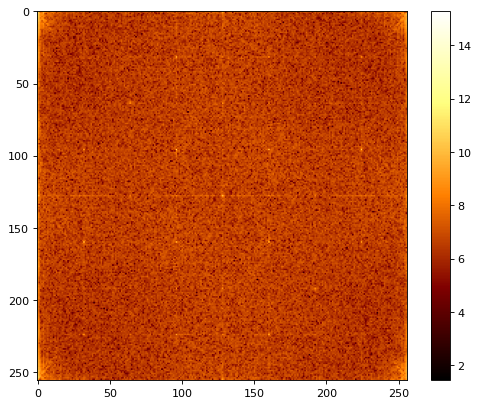

In [7]:
image_dir = "./TestSet/latent-diffusion_text2img_valid/"
denoised_dir = "KAIR/results/latent-diffusion_text2img_valid_dncnn3"
mean_noise = process(image_dir, denoised_dir)
plot_fft(mean_noise, "afmhot")

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:10<00:00, 93.05it/s]


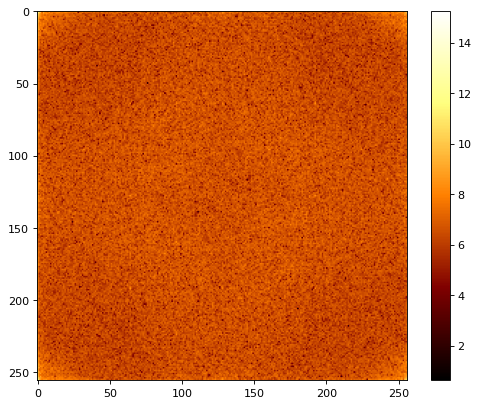

In [12]:
image_dir = "./TestSet/progan_lsun/"
denoised_dir = "KAIR/results/progan_lsun_dncnn3"
mean_noise = process(image_dir, denoised_dir)
plot_fft(mean_noise, "afmhot")

100%|██████████| 770/770 [00:14<00:00, 52.83it/s]


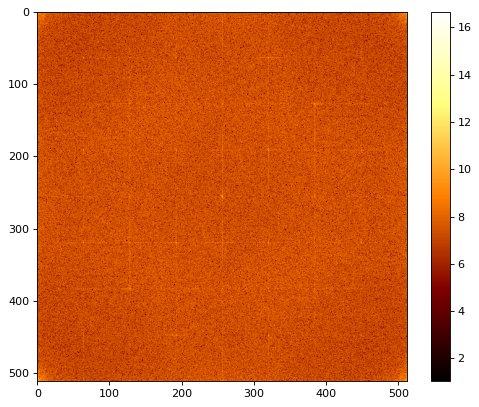

In [28]:
image_dir = "./TestSet/stable_diffusion_512_50steps/"
denoised_dir = "/home/martin/Documents/MScProject/project_local/KAIR/results/stable_diffusion_512_50steps_dncnn3"
mean_noise = process(image_dir, denoised_dir)
plot_fft(mean_noise, "afmhot")

100%|██████████| 334/334 [00:06<00:00, 50.27it/s]


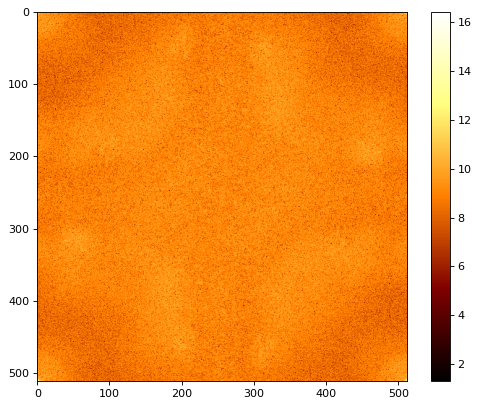

In [29]:
image_dir = "./TestSet/stylegan2_afhqv2_512x512/"
denoised_dir = "KAIR/results/stylegan2_afhqv2_512x512_dncnn3"
mean_noise = process(image_dir, denoised_dir)
plot_fft(mean_noise, "afmhot")